In [2]:
from sdRDM.generator import generate_python_api
import numpy as np

%load_ext autoreload
%autoreload 2
from HPLC.tools.hplcanalyzer import HPLCAnalyzer
from HPLC.core import Molecule
from HPLC.tools.parser import parse_experiment
from HPLC.tools.visualize import visualize_by_retention_times, visualize_measurements

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [3]:
# generate_python_api("specifications/HPLC.md", "", "HPLC")

## Read in and visualize HPLC data

In [23]:
dataset_path = "/Users/max/Downloads/GC_HAO 2023-07-24 21-36-55 2"

experiment = parse_experiment(dataset_path)

visualize_measurements(experiment, detector="fid")

In [24]:
# Initialize the analyzer
analyzer = HPLCAnalyzer(data=experiment)

# Add analyte molecules which should be quantified by specifying their retention time
substrate = analyzer.add_analyte(
    name="substrate",
    retention_time=6.95,
)

product1 = analyzer.add_analyte(
    name="product1",
    retention_time=9.53,
)

product2 = analyzer.add_analyte(
    name="product2",
    retention_time=10.01,
)

# Add internal standard information
standard = analyzer.add_internal_standard(
    name="internal standard",
    retention_time=7.78,
    molecular_weight=200.18,
    concentrations=np.linspace(0, 100, 10),
    signals=np.linspace(0, 2, 10),
)

In [32]:
# Calculate concentrations of all specified analytes
analyzer.calculate_concentrations(product1)

In [34]:
analyzer.calculate_concentration(product1, internal_standard)

AttributeError: 'HPLCAnalyzer' object has no attribute 'calculate_concentration'

In [ ]:
product1.hours

[autoreload of HPLC.core.molecule failed: Traceback (most recent call last):
  File "/Users/max/miniconda3/envs/sdrdm/lib/python3.11/site-packages/IPython/extensions/autoreload.py", line 273, in check
    superreload(m, reload, self.old_objects)
  File "/Users/max/miniconda3/envs/sdrdm/lib/python3.11/site-packages/IPython/extensions/autoreload.py", line 471, in superreload
    module = reload(module)
             ^^^^^^^^^^^^^^
  File "/Users/max/miniconda3/envs/sdrdm/lib/python3.11/importlib/__init__.py", line 169, in reload
    _bootstrap._exec(spec, module)
  File "<frozen importlib._bootstrap>", line 621, in _exec
  File "<frozen importlib._bootstrap_external>", line 940, in exec_module
  File "<frozen importlib._bootstrap>", line 241, in _call_with_frames_removed
  File "/Users/max/Documents/GitHub/HPLC-specification/HPLC/core/molecule.py", line 16, in <module>
    class Molecule(sdRDM.DataModel):
  File "/Users/max/Documents/GitHub/HPLC-specification/HPLC/core/molecule.py", line 

AttributeError: 'Molecule' object has no attribute 'hours'

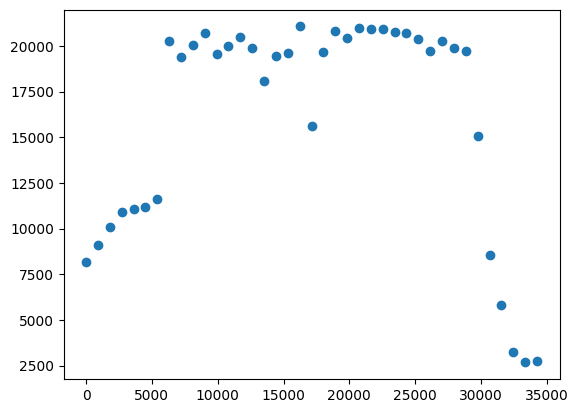

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(analyzer.datetime_to_relative_time(
    product1.times), product1.concentrations)

## Visualize data by retention time

In [ ]:
visualize_by_retention_times(
    hplc_experiment=experiment,
    retention_times=[7, 7.8, 9.5, 10],
    detector="fid"
)

In [ ]:
from HPLC.core.molecule import Molecule


Molecule()

Molecule(id='molecule4', name=None, inchi=None, molecular_weight=None, retention_time=None, times=[], peaks=[], concentrations=[], standard=None, role=None)

In [ ]:
internal_standard.slope

standards: <class 'sdRDM.base.listplus.ListPlus'>


0.019999999999999993

In [ ]:
product1.

In [ ]:
substrate.standard

Standard(id='standard3', concentration=[], signal=[], concentration_unit=None)